In [1]:
import os, sys, torch
sys.path.append(os.path.abspath('../../modules'))
sys.path.append(os.path.abspath('../../modules/mnist'))
import vae_train as vt
import vae_ortho as vo
import vae_surgery as vs
import classifier as cl
import datapipe
import utility as ut

device = ut.get_device()

**Train a VAE on MNIST-138**

Epochs: 100%|█████████████████████████████████| 107/107 [05:05<00:00,  2.86s/it]
Corrupt JPEG data: premature end of data segment


Video saved at ../../data/MNIST-138/vae/samples/sample_evolution.mp4
Time taken by summarize_training is 2.2727 seconds


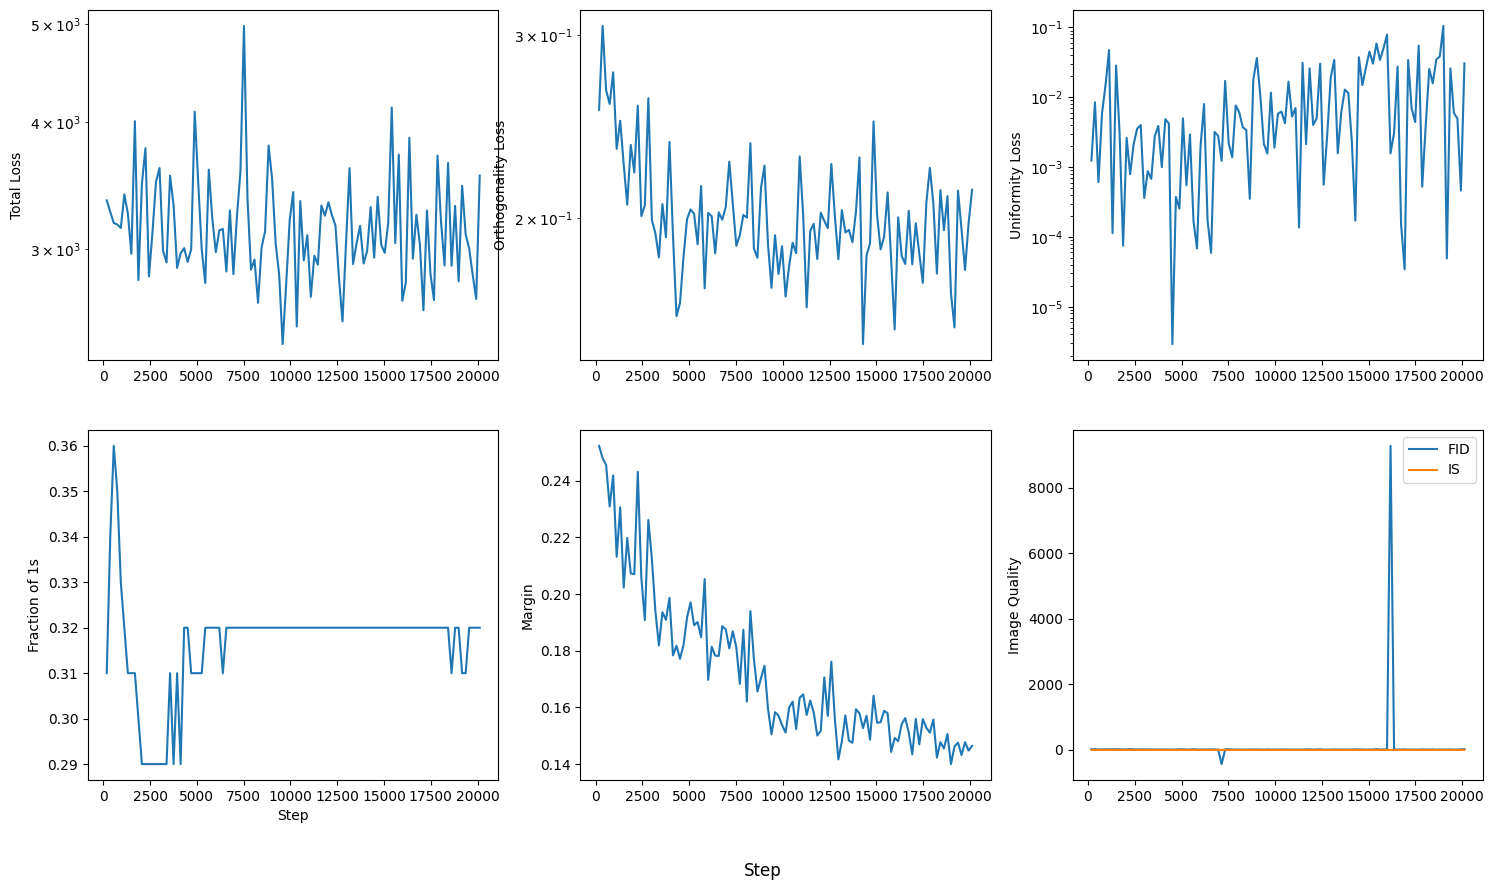

In [8]:
folder = "../../data/MNIST-138/vae"
num_steps = 20000
batch_size = 100 
collect_interval = "epoch"
all_digits = [1, 3, 8]
log_interval = "epoch"
classifier_path = '../../data/MNIST-138/classifiers/MNISTClassifier.pth'

kl_weight = 1e0
uniformity_weight = 0e3

vt.train(None, folder, num_steps, batch_size, collect_interval=collect_interval, log_interval=log_interval, all_digits=all_digits,\
         classifier_path=classifier_path, kl_weight=kl_weight, uniformity_weight=uniformity_weight)

**Run o-step on vaeu**

Epochs: 100%|█████████████████████████████████████| 2/2 [00:11<00:00,  5.74s/it]


Video saved at ../../data/MNIST-138/vaeu-ohat_rest/samples/sample_evolution.mp4
Time taken by summarize_training is 0.3739 seconds


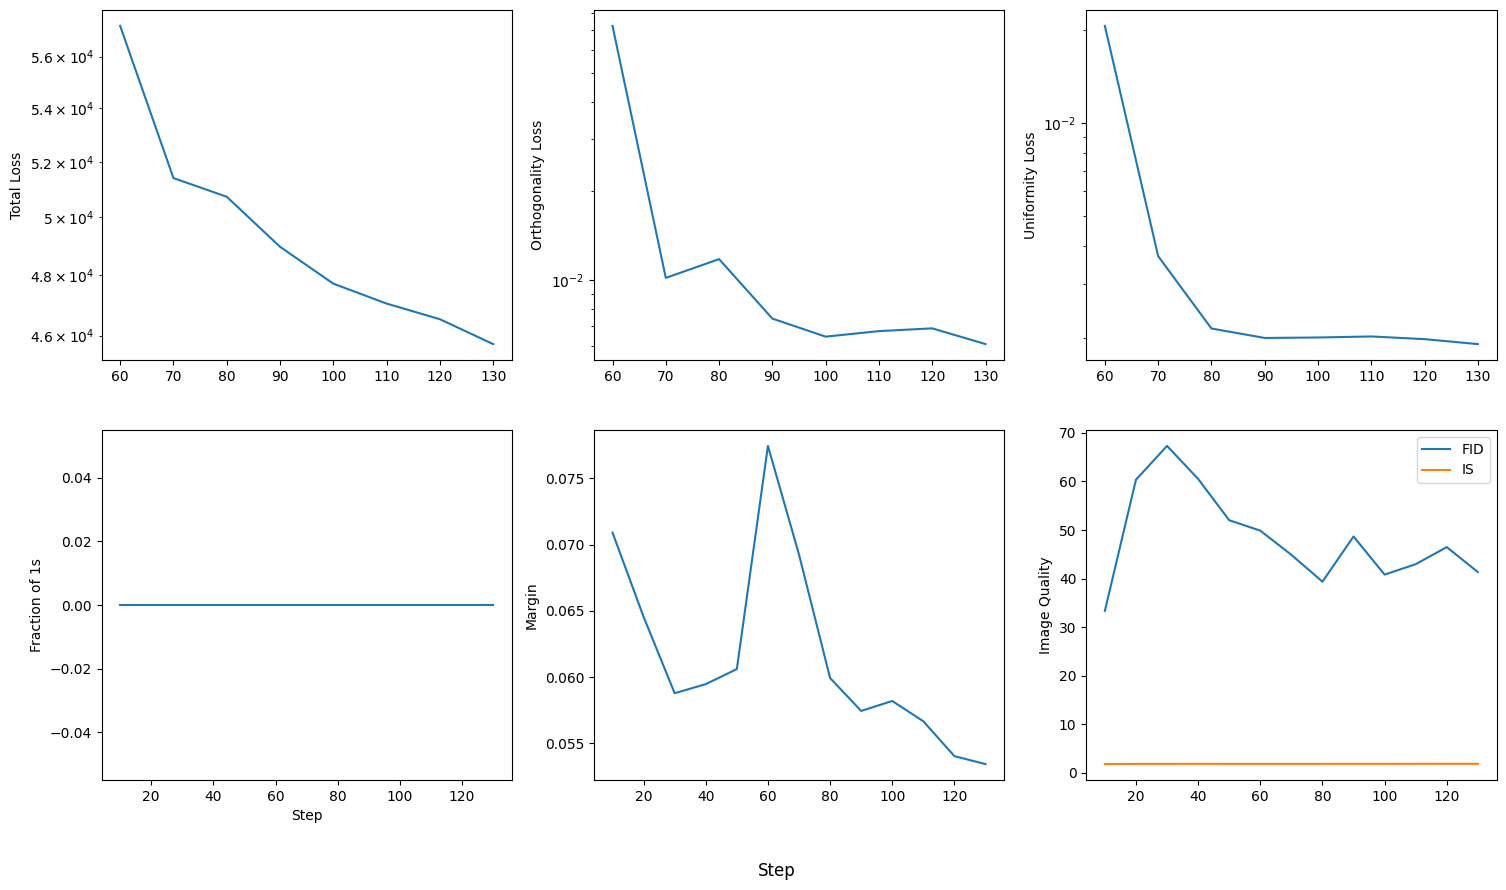

In [3]:
model_path = "../../data/MNIST-138/vaeu/checkpoints/vae_epoch_107.pth"

num_steps = 100
batch_size = 100
log_interval = 10
collect_interval = "epoch"

all_digits = [1, 3, 8]
forget_digit = 1
classifier_path = '../../data/MNIST-138/classifiers/MNISTClassifier.pth'

kl_weight = 1
uniformity_weight = 1e4
orthogonality_weight = 1e5
forget_weight = 0.



if uniformity_weight == 0.:
    suffix = 'o'
else:
    suffix = 'ohat'
    
if forget_weight == 0.:
    suffix += '_rest'
else:
    suffix += '_all'


folder = f"../../data/MNIST-138/vaeu-{suffix}"

vo.train(model_path, folder, num_steps, batch_size, 
         collect_interval=collect_interval,log_interval=log_interval,\
         kl_weight=kl_weight, uniformity_weight=uniformity_weight,\
         orthogonality_weight=orthogonality_weight, forget_weight=forget_weight,\
         all_digits=all_digits, forget_digit=forget_digit, classifier_path=classifier_path)

**Run s-step on vaeu-o**

Epochs: 100%|█████████████████████████████████████| 2/2 [00:11<00:00,  5.57s/it]
Corrupt JPEG data: premature end of data segment


Video saved at ../../data/MNIST-138/vaeu-o-s/samples/sample_evolution.mp4
Time taken by summarize_training is 0.4189 seconds


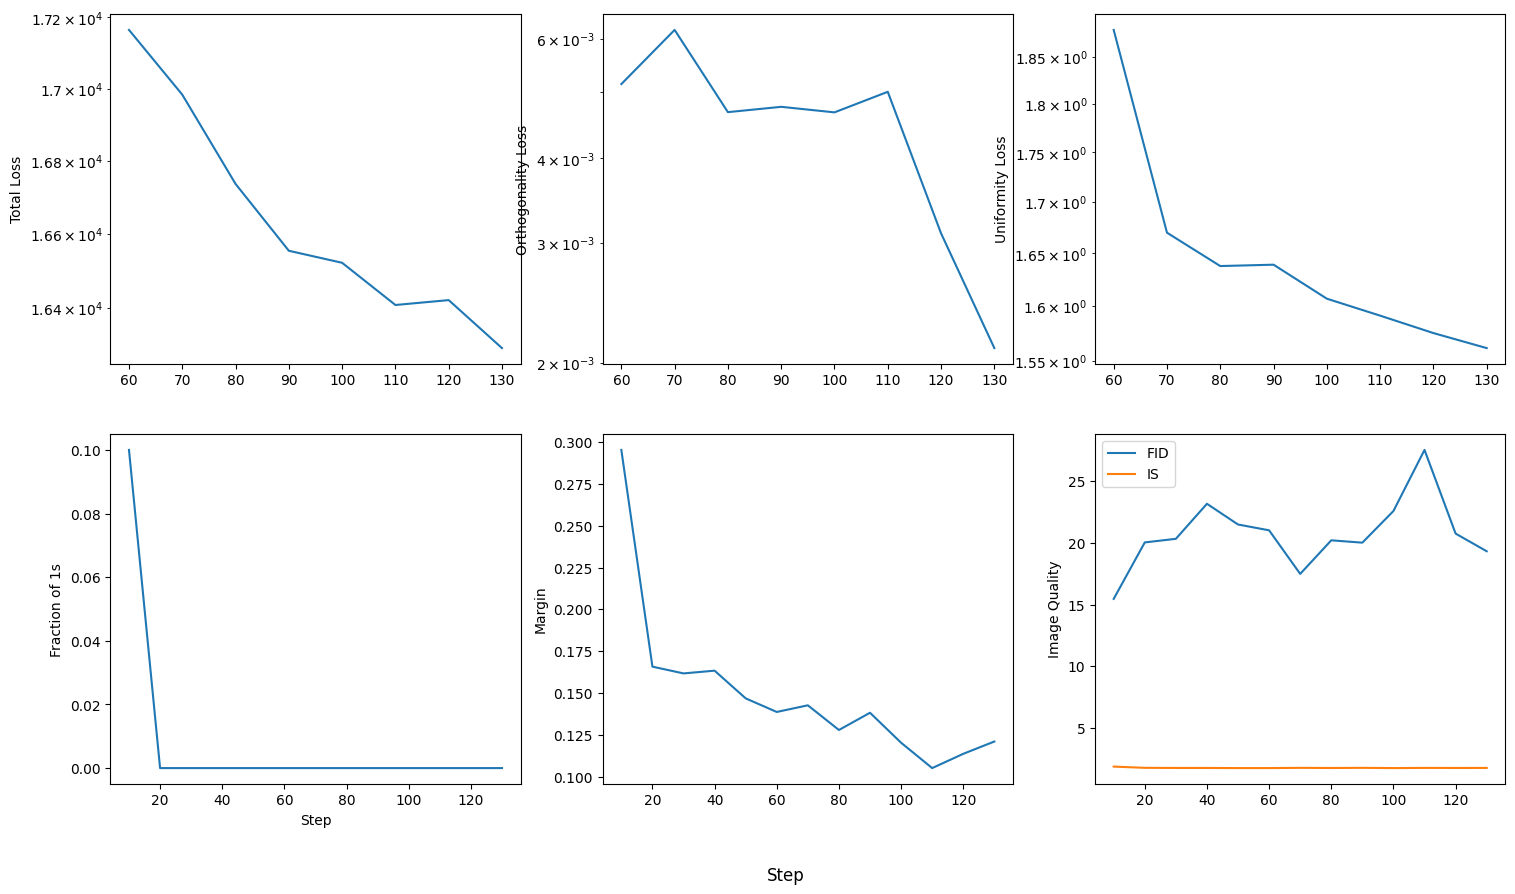

In [20]:
model_path = "../../data/MNIST-138/vaeu-ou/checkpoints/vae_epoch_1.pth"
folder = "../../data/MNIST-138/vaeu-o-s"
num_steps = 100
batch_size = 100
log_interval = 10
collect_interval = "epoch"

all_digits = [1, 3, 8]
forget_digit = 1
classifier_path = '../../data/MNIST-138/classifiers/MNISTClassifier.pth'

kl_weight = 1e0
uniformity_weight = 0

vs.train(model_path, folder, num_steps, batch_size, collect_interval=collect_interval, log_interval=log_interval,\
         kl_weight=kl_weight, uniformity_weight=uniformity_weight,\
         all_digits=all_digits, forget_digit=forget_digit, classifier_path=classifier_path)

**Run s-step on vaeu**

Epochs: 100%|█████████████████████████████████████| 8/8 [00:45<00:00,  5.63s/it]
Corrupt JPEG data: premature end of data segment


Video saved at ../../data/MNIST-138/vaeu-s/samples/sample_evolution.mp4
Time taken by summarize_training is 0.4924 seconds


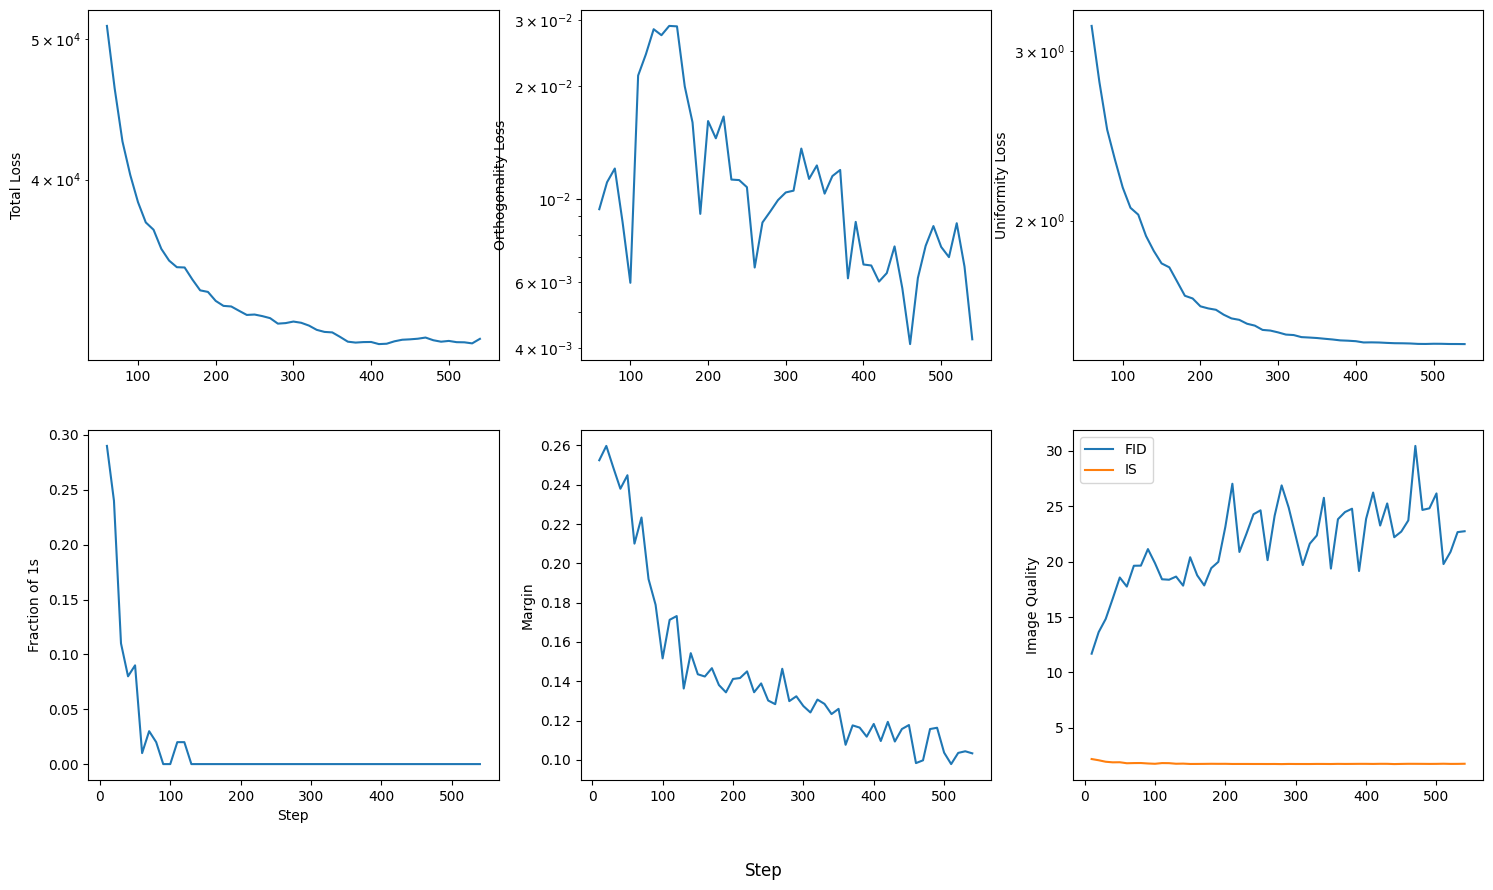

In [21]:
model_path = "../../data/MNIST-138/vaeu/checkpoints/vae_epoch_107.pth"
folder = "../../data/MNIST-138/vaeu-s"
num_steps = 500
batch_size = 100
log_interval = 10
collect_interval = "epoch"

all_digits = [1, 3, 8]
forget_digit = 1
classifier_path = '../../data/MNIST-138/classifiers/MNISTClassifier.pth'

kl_weight = 1e0
uniformity_weight = 0

vs.train(model_path, folder, num_steps, batch_size, collect_interval=collect_interval, log_interval=log_interval,\
         all_digits=all_digits, forget_digit=forget_digit, classifier_path=classifier_path)

**Run su-step on vaeu**

Epochs: 100%|█████████████████████████████████████| 5/5 [00:29<00:00,  5.82s/it]


Video saved at ../../data/MNIST-138/vaeu-su/samples/sample_evolution.mp4
Time taken by summarize_training is 0.4526 seconds


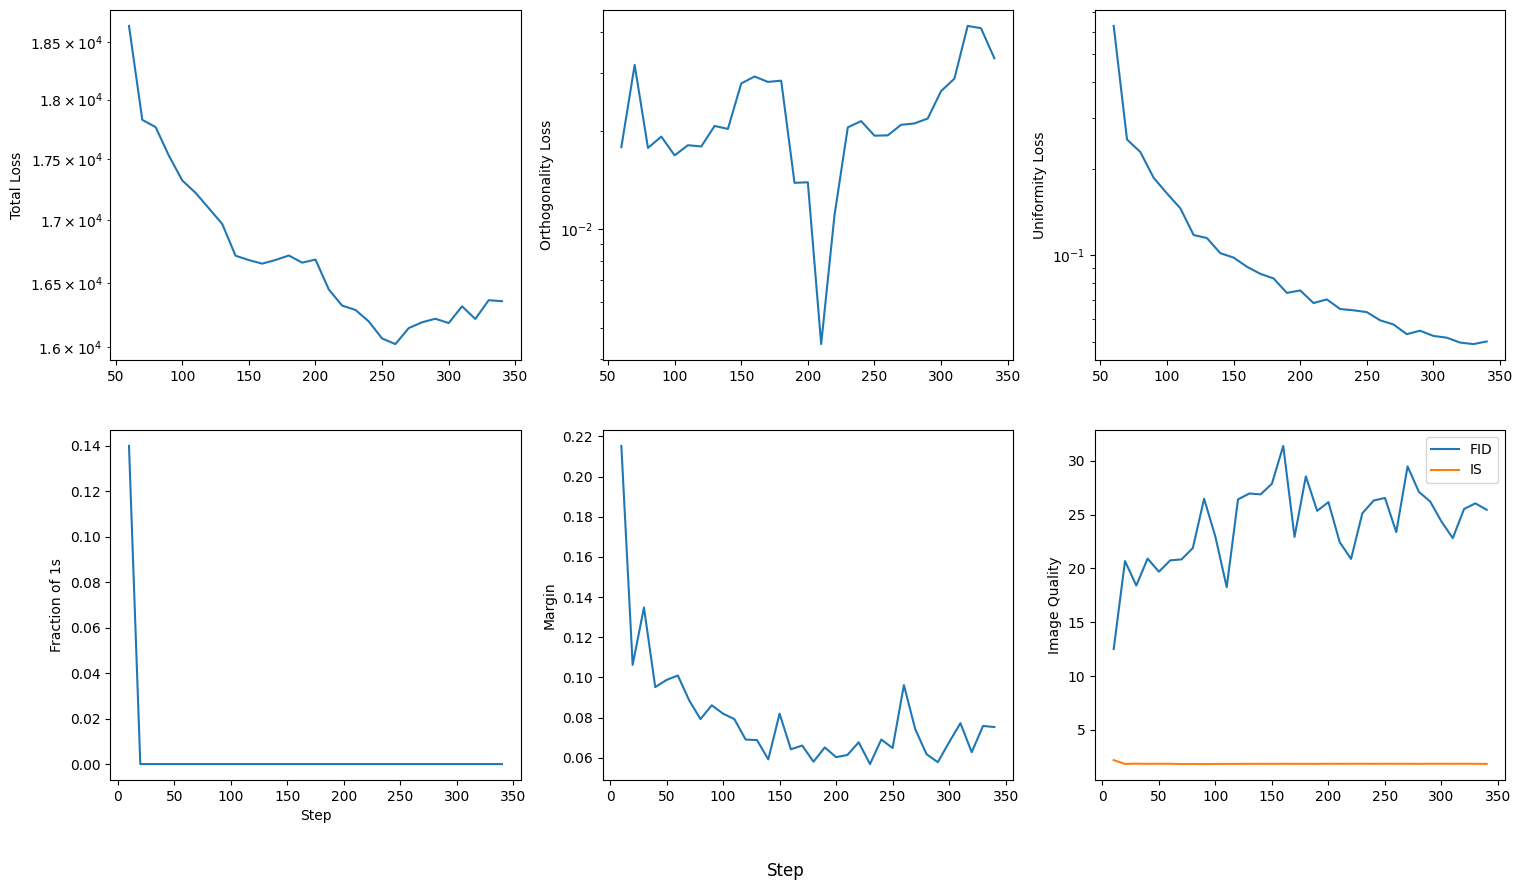

In [24]:
model_path = "../../data/MNIST-138/vaeu/checkpoints/vae_epoch_107.pth"
folder = "../../data/MNIST-138/vaeu-su"
num_steps = 300
batch_size = 100
log_interval = 10
collect_interval = "epoch"

all_digits = [1, 3, 8]
forget_digit = 1
classifier_path = '../../data/MNIST-138/classifiers/MNISTClassifier.pth'

kl_weight = 1e0
uniformity_weight = 1e2

vs.train(model_path, folder, num_steps, batch_size, collect_interval=collect_interval, log_interval=log_interval,\
         kl_weight=kl_weight, uniformity_weight=uniformity_weight,\
         all_digits=all_digits, forget_digit=forget_digit, classifier_path=classifier_path)

**Run of-step on vaeu**

Epochs: 100%|█████████████████████████████████████| 2/2 [00:11<00:00,  5.56s/it]


Video saved at ../../data/MNIST-138/vaeu-of/samples/sample_evolution.mp4
Time taken by summarize_training is 0.4368 seconds


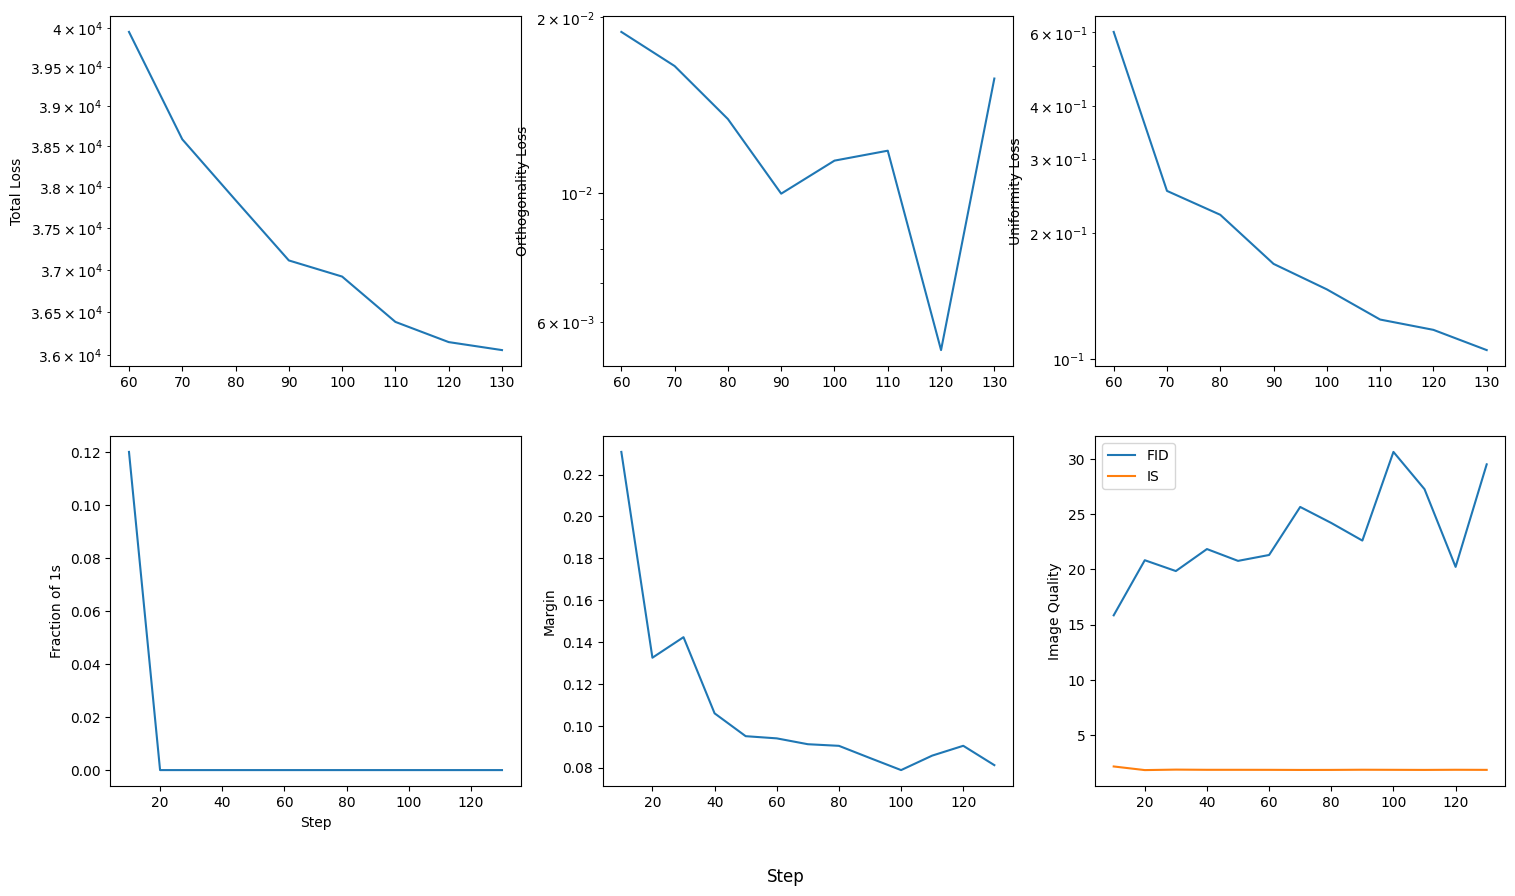

In [27]:
model_path = "../../data/MNIST-138/vaeu/checkpoints/vae_epoch_107.pth"
folder = "../../data/MNIST-138/vaeu-of"
num_steps = 100
batch_size = 100
log_interval = 10
collect_interval = "epoch"

all_digits = [1, 3, 8]
classifier_path = '../../data/MNIST-138/classifiers/MNISTClassifier.pth'

kl_weight = 1e0
uniformity_weight = 1e3
orthogonality_weight = 1e2

vo.train_to_forget(model_path, folder, num_steps, batch_size, collect_interval=collect_interval,\
         uniformity_weight=uniformity_weight, orthogonality_weight=orthogonality_weight, log_interval=log_interval,\
         all_digits=all_digits, classifier_path=classifier_path)

In [16]:
cl.train("../../data/MNIST/classifiers", cl.MNISTClassifier, 100, 1000, all_digits=list(range(10)))

Epochs: 100%|█| 100/100 [02:21<00:00,  1.41s/epoch, loss=0.0000, test_acc=98.21%


In [6]:
set(range(10)) == set(range(19))

False

In [5]:
dl = datapipe.MNIST().get_dataloader(100)
img, _ = next(iter(dl))
img = img.to(device)
identifier = cl.get_classifier('../../data/MNIST-138/classifiers/MNISTClassifier.pth', 'mps')

In [4]:
cl.frechet_inception_distance(img, img, identifier)

-4.449436029188569e-06

In [6]:
c = ut.get_config(folder)

In [11]:
logits = identifier(img)
torch.bincount(torch.argmax(logits, dim=1), minlength=10)

tensor([ 0, 20,  0, 31,  0,  0,  0,  0, 49,  0], device='mps:0')

In [4]:
a = {'7':0}
b = a.copy()